# ANALYSIS OF ACTIVITY LOG DATA OF A SUPERSTORE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
# DATA
data = pd.read_csv('datasets/Superstore.csv', parse_dates=['Order Date', 'Ship Date'])

## EXPLORATORY DATA ANALYSIS

#### Data Sample

In [4]:
# Data Sample
data.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6090,6091,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,10035,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.65,3,0.10,18.18
9261,9262,CA-2017-111388,2017-09-02,2017-09-02,Same Day,SU-20665,Stephanie Ulpright,Home Office,United States,Seattle,...,98103,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",215.98,3,0.20,-2.70
3762,3763,CA-2016-156251,2016-08-13,2016-08-18,Second Class,TS-21160,Theresa Swint,Corporate,United States,West Allis,...,53214,Central,FUR-BO-10001337,Furniture,Bookcases,O'Sullivan Living Dimensions 2-Shelf Bookcases,241.96,2,0.00,24.20
9639,9640,CA-2015-116638,2015-01-28,2015-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.64,13,0.40,-1862.31
4735,4736,CA-2015-155054,2015-06-13,2015-06-19,Standard Class,PS-19045,Penelope Sewall,Home Office,United States,Lewiston,...,4240,East,OFF-BI-10004970,Office Supplies,Binders,"ACCOHIDE 3-Ring Binder, Blue, 1""",8.26,2,0.00,3.88
4644,4645,CA-2015-147501,2015-08-02,2015-08-06,Standard Class,Co-12640,Corey-Lock,Consumer,United States,Seattle,...,98105,West,TEC-MA-10001972,Technology,Machines,Okidata C331dn Printer,558.40,2,0.20,41.88
2082,2083,CA-2017-104647,2017-02-23,2017-03-01,Standard Class,CK-12595,Clytie Kelty,Consumer,United States,Los Angeles,...,90008,West,OFF-PA-10002870,Office Supplies,Paper,"Ampad Phone Message Book, Recycled, 400 Messag...",37.44,6,0.00,16.85
7889,7890,CA-2016-148684,2016-12-25,2016-12-29,Standard Class,TS-21655,Trudy Schmidt,Consumer,United States,Fayetteville,...,72701,South,OFF-AR-10003811,Office Supplies,Art,Newell 327,19.89,9,0.00,5.37
5819,5820,CA-2014-124730,2014-11-26,2014-11-26,Same Day,LS-17245,Lynn Smith,Consumer,United States,Utica,...,13501,East,OFF-LA-10001613,Office Supplies,Labels,Avery File Folder Labels,11.52,4,0.00,5.64
8300,8301,CA-2015-109169,2015-04-20,2015-04-24,Standard Class,OT-18730,Olvera Toch,Consumer,United States,Detroit,...,48234,Central,OFF-EN-10003296,Office Supplies,Envelopes,Tyvek Side-Opening Peel & Seel Expanding Envel...,180.96,2,0.00,81.43


#### Variables in Dataframe

In [5]:
# Name of variables
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# Converts percentage discount to monetary value
data['Discount'] = data.Sales * data.Discount

#### Data Infromation

In [7]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
# Elimina la variable 'Row ID'
data.drop('Row ID', axis=1, inplace=True)

In [9]:
# Temporal Range
first_date = data['Order Date'].dt.date.min()
last_date = data['Order Date'].dt.date.max()

print('='*64)
print('THE DATA INCLUDES FROM '+str(first_date)+' TO '+str(last_date))
print('='*64)

THE DATA INCLUDES FROM 2014-01-03 TO 2017-12-30


In [10]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.00,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,9994.00,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.00,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.00,32.28,164.03,0.00,0.00,1.04,14.87,11319.24
Profit,9994.00,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98


#### Number of Unique Values per Categorical Variable

In [11]:
# NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE
print('NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE')
print('='*64)
for cat in data.select_dtypes('object'):
        print(cat+' : '+ str(data[cat].nunique()))

NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE
Order ID : 5009
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


#### Unique Values per Categorical variable

In [12]:
print('UNIQUE VALUES PER CATEGORICAL FEATURE:')
print('='*64)
print('='*64)
for vcat in data.select_dtypes('object'):
    if data[vcat].nunique() < 21:
        print(vcat+' :')
        print(data[vcat].unique())
        print('='*64)

UNIQUE VALUES PER CATEGORICAL FEATURE:
Ship Mode :
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment :
['Consumer' 'Corporate' 'Home Office']
Country :
['United States']
Region :
['South' 'West' 'Central' 'East']
Category :
['Furniture' 'Office Supplies' 'Technology']
Sub-Category :
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [13]:
features =  ['Sales','Quantity','Discount','Profit']

## ANALISIS BY REGION

#### Data Grouped By Region

In [14]:
# Running auxiliar function

%run ./auxiliar_functions/groupingData.ipynb

In [15]:
# Grouping data by 'Region'
# =========================================================================

data_by_region = groupingData(data, features, 'Region')
data_by_region

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Region,,,,,,,,
Central,501239.89,8780,77787.66,39706.36,21.82,23.18,24.11,13.86
East,678781.24,10618,94608.63,91522.78,29.55,28.04,29.33,31.96
South,391721.91,6209,56779.16,46749.43,17.05,16.39,17.60,16.32
West,725457.82,12266,93406.68,108418.45,31.58,32.39,28.96,37.86


#### Visualization Of Numerical Variables 

In [16]:
# Running auxiliar function 

%run ./auxiliar_functions/plotDataGroups.ipynb

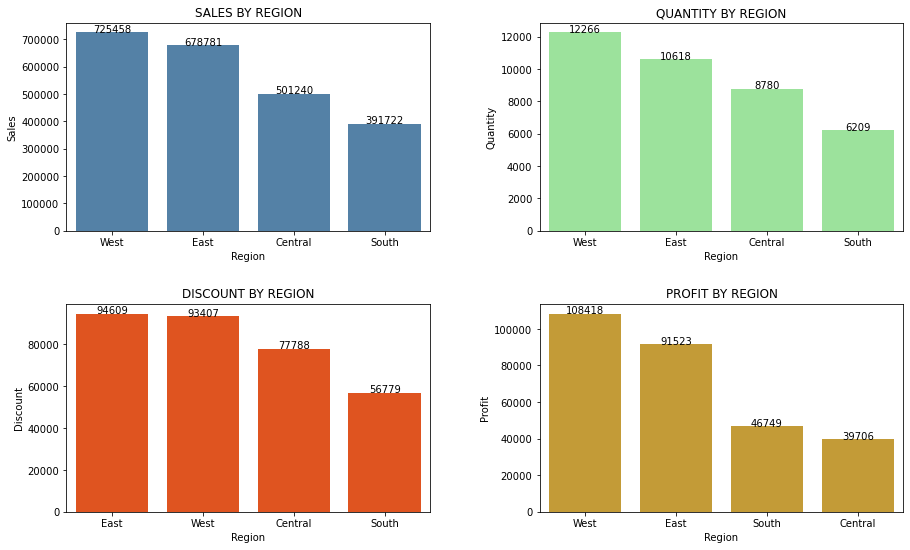

In [17]:
# DATA VISUALIZATION BY REGION
# ================================================================================

plotDataGroups(data_by_region, features, 'Region')

## ANALISIS BY CUSTOMER SEGMENT

#### Data grouped by Customer Segment

In [18]:
# GROUPING DATA BY SEGMENT
# =========================================================================
data_by_segment = groupingData(data, features, 'Segment')
data_by_segment

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Segment,,,,,,,,
Consumer,1161401.34,19521,166267.36,134119.21,50.56,51.54,51.54,46.83
Corporate,706146.37,11608,91389.40,91979.13,30.74,30.65,28.33,32.12
Home Office,429653.15,6744,64925.37,60298.68,18.70,17.81,20.13,21.05


#### Visualization of Data by Customer Segment

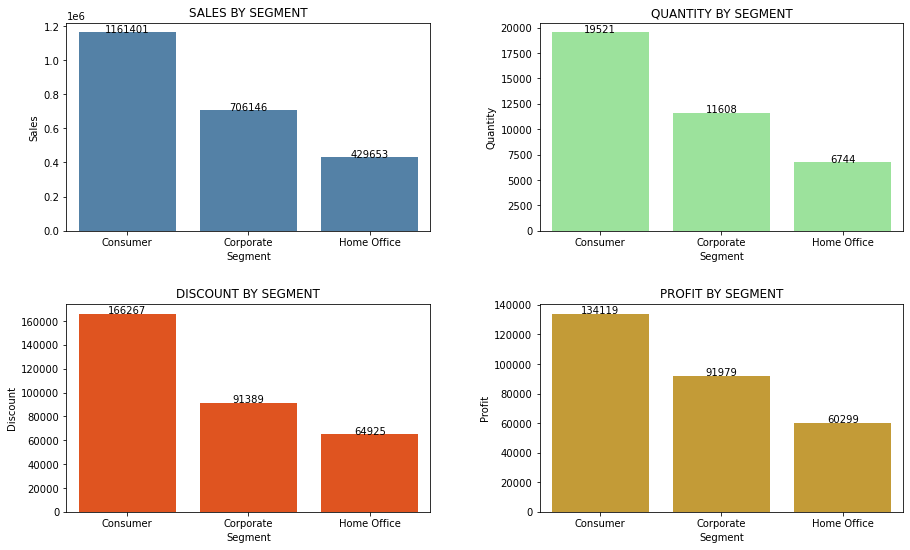

In [19]:
# DATA VISUALIZATION BY SEGMENT
# ================================================================================
plotDataGroups(data_by_segment, features, 'Segment')

## ANALISIS BY PRODUCT CATEGORY

#### Data grouped by Product Category

In [20]:
# GROUPING BY CATEGORY
# =========================================================================
data_by_category = groupingData(data, features, 'Category')
data_by_category

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Category,,,,,,,,
Furniture,741999.80,8028,123516.54,18451.27,32.30,21.20,38.29,6.44
Office Supplies,719047.03,22906,76404.94,122490.80,31.30,60.48,23.69,42.77
Technology,836154.03,6939,122660.65,145454.95,36.40,18.32,38.02,50.79


#### Visualization of Data by Product Category

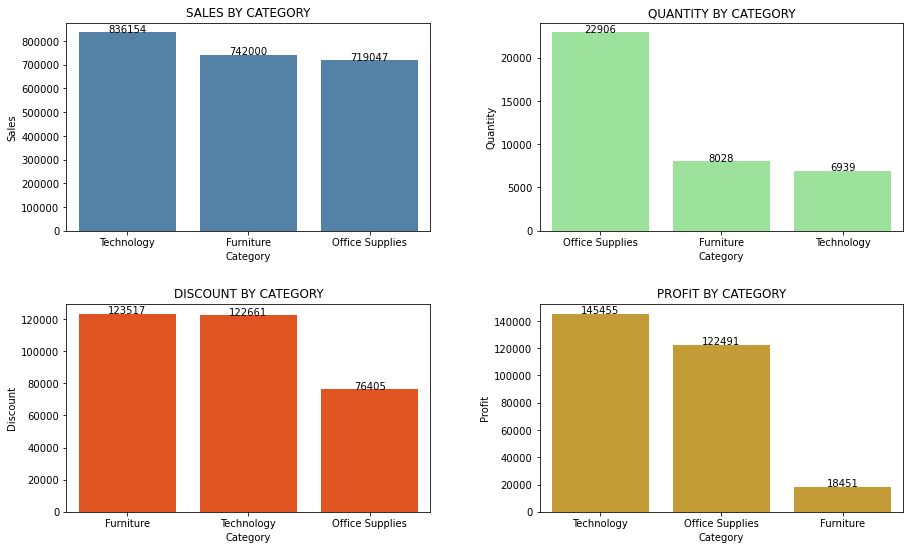

In [21]:
# DATA VISUALIZATION BY CATEGORY
# ================================================================================
plotDataGroups(data_by_category, features, 'Category')

## ANALISIS BY SUB-CATEGORY PRODUCT

In [22]:
# GROUPING BY SUB-CATEGORY
# ================================================================================
data_by_sub = groupingData(data, features, 'Sub-Category')

#### Visualization of Data by Sub-Category Product

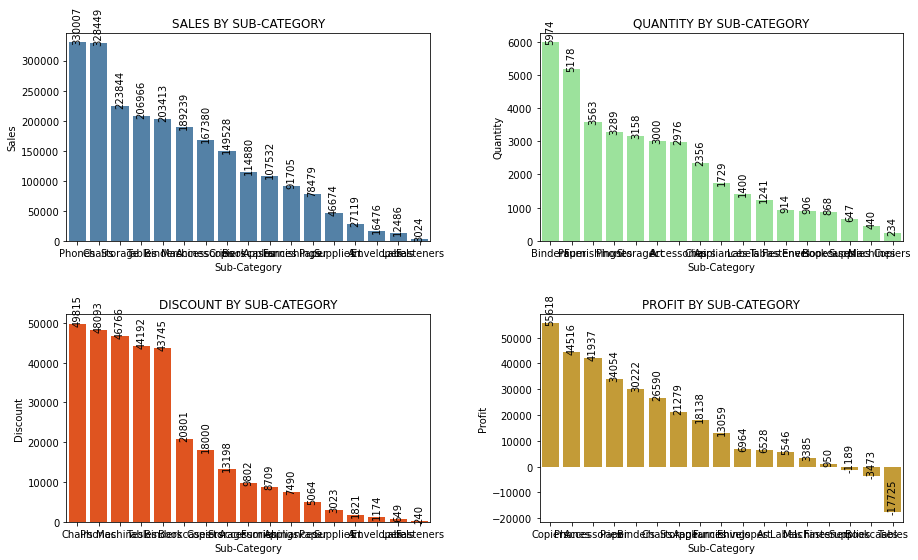

In [23]:
# DATA VISUALIZATION BY SUB-CATEGORY
# ================================================================================
plotDataGroups(data_by_sub, features, 'Sub-Category', 45, 90)

### SUBCATEGORIES REPORTING LOSSES

In [24]:
# Only Losses Data
losses = data[data['Sub-Category'].isin(['Supplies','Bookcases','Tables'])]

# Losses grouped by the variables that report losses
losses_by_sub = groupingData(losses, features, 'Sub-Category')
losses_by_sub

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Sub-Category,,,,,,,,
Bookcases,114880.00,868,20800.59,-3472.56,31.17,31.49,30.58,15.51
Supplies,46673.54,647,3022.87,-1189.10,12.67,23.48,4.44,5.31
Tables,206965.53,1241,44192.20,-17725.48,56.16,45.03,64.97,79.18


#### Visualization of Losses by Subcategory

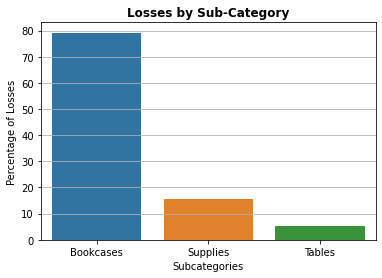

In [25]:
# Visualization of losses by 'Sub-Category
sns.barplot(x=losses_by_sub.index, y=losses_by_sub['ProfitPercent'].sort_values(ascending=False))
plt.title("Losses by Sub-Category", fontweight="bold")
plt.xlabel("Subcategories")
plt.ylabel("Percentage of Losses")
plt.grid(axis='y')
plt.show()

#### Visualization of Losses

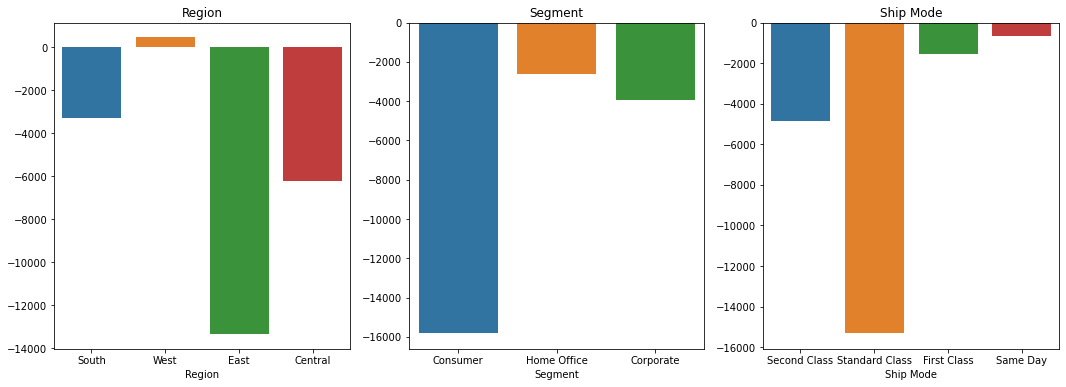

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(x=losses[var], y=losses.Profit, estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)

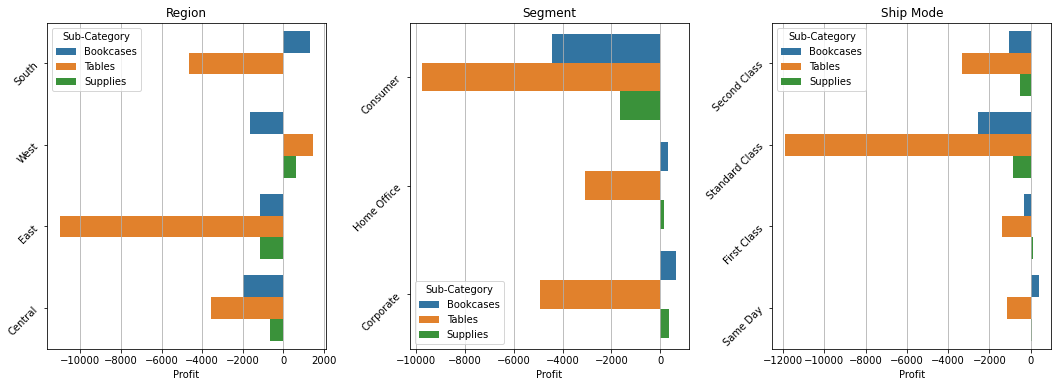

In [27]:
# Visualizing loss making Sub-Categories by categorical variables
# ===========================================================================

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(y=losses[var], x=losses.Profit, hue=losses['Sub-Category'], estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)
    ax[i].tick_params(axis='y', rotation=45)
    ax[i].grid(axis='x')
    
    
plt.subplots_adjust(wspace=.3)

### Tables Losses

In [28]:
# Only Tables
tables = losses[losses['Sub-Category']=='Tables']

# Tables data grouped by 'Customer ID'
tables_product_id = tables.groupby('Product ID').sum()

# Create 'LostPercent' variable
tables_product_id['LostPercent'] = tables_product_id.Profit / sum(tables_product_id.Profit) * 100

# Sorting data by 'LostPercent'
tables_product_id = tables_product_id.sort_values('LostPercent', ascending=False)


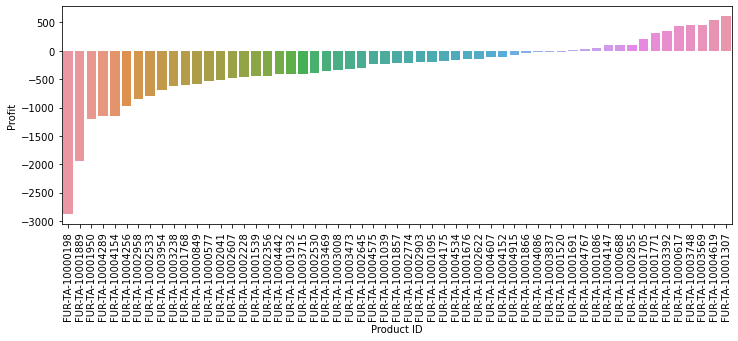

In [29]:
plt.figure(figsize=(12, 4))
sns.barplot(x=tables_product_id.index, y=tables_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### Bookcases Losses

In [34]:
# Only Bookcases Data
bookcases = losses[losses['Sub-Category']=='Bookcases']

# Bookcases data group by 'Product ID'
bookcases = groupingData(bookcases, features, 'Product ID')
bookcases.sort_values('Profit', inplace=True)

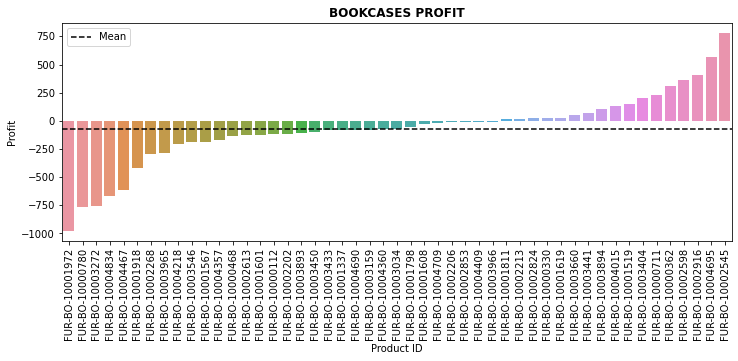

In [31]:
plt.figure(figsize=(12, 4))
sns.barplot(x=bookcases.index, y=bookcases.Profit)
plt.title('BOOKCASES PROFIT-', fontweight='bold')
plt.axhline(bookcases.Profit.mean(), linestyle='--',color='black', label='Mean')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [38]:
#bookcases_lost_product_id = 
bookcases_loss_percent = bookcases['Profit'].where(bookcases.Profit <= 0)
bookcases_loss_percent = bookcases_loss_percent.dropna()
#bookcases_loss_percent

### Supplies Losses

In [39]:
# Productos que generan pérdidas
supplies = losses[losses['Sub-Category']=='Supplies']
supplies_product_id = supplies.groupby('Product ID').sum()
supplies_product_id['lost_percent'] = supplies_product_id.Profit / sum(supplies_product_id.Profit) * 100
supplies_product_id = supplies_product_id.sort_values('lost_percent', ascending=False)
#supplies_product_id

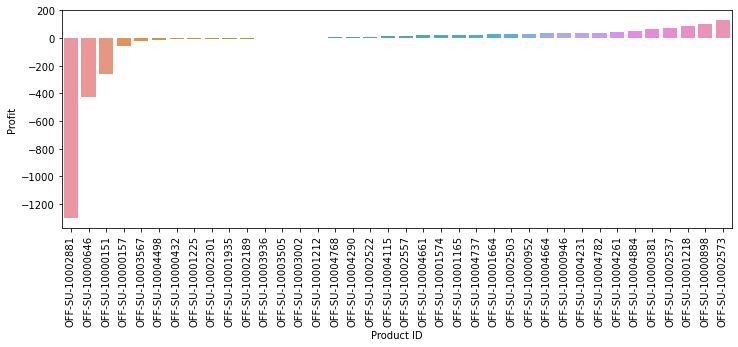

In [43]:
plt.figure(figsize=(12, 4))

sns.barplot(x=supplies_product_id.index, y=supplies_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### ANALYSIS BY SHIP MODE

In [ ]:
grouped_by_shipmode = data.groupby(['Ship Mode']).sum().drop('Postal Code', axis=1)
grouped_by_shipmode['percent_sales'] = round(grouped_by_shipmode.Sales / sum(grouped_by_shipmode.Sales) * 100, 2)
grouped_by_shipmode['percent_quantity'] = round(grouped_by_shipmode.Quantity / sum(grouped_by_shipmode.Quantity) * 100, 2)
grouped_by_shipmode['percent_discount'] = round(grouped_by_shipmode.Discount / sum(grouped_by_shipmode.Discount) * 100, 2)
grouped_by_shipmode['percent_profit'] = round(grouped_by_shipmode.Profit / sum(grouped_by_shipmode.Profit) * 100, 2)
grouped_by_shipmode = grouped_by_shipmode.sort_values(by='percent_quantity', ascending=False)
grouped_by_shipmode

In [ ]:
sns.barplot(x=grouped_by_shipmode.index, y=grouped_by_shipmode.percent_quantity)
plt.title('CANTIDAD DE PRODUCTOS POR MODO DE ENVÍO')
plt.xlabel('Modo de envío')
plt.ylabel('Porcentaje')
plt.grid(axis='y')
plt.show()

## TEMPORAL ANALYSIS

In [ ]:
# Create Variable "OrderYear"
data['OrderYear'] = data['Order Date'].dt.year

# Create Variable "OrderMonth"
data['OrderMonth'] = data['Order Date'].dt.month

# Create Variable "OrderDay"
data['OrderDay'] = data['Order Date'].dt.day

# Create Variable "OrderWeekday"
data['OrderWeekday'] = data['Order Date'].dt.weekday

# Lista de los meses
meses = ['January','February','March','April','May','June','July','Agosto',
         'September','October','November','December']

# Serie temporal
data_date = data.set_index('Order Date').drop('Postal Code', axis=1)

In [ ]:
# Datos agrupados por mes
data_by_month = data_date.groupby(data_date.index.month).sum()
data_by_month

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(18,12))

# Ventas por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Sales, color='steelblue', ax=ax[0])
ax[0].set_title('TOTAL DE VENTAS POR MES: 2014-2017')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1,13))
ax[0].set_xticklabels(meses)

# Utilidades por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Profit, color='lightgreen', ax=ax[1])
ax[1].set_title('TOTAL DE UTILIDADES POR MES: 2014-2017')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Utilidades')
ax[1].set_xticks(np.arange(1,13))
ax[1].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Discount, color='orangered', ax=ax[2])
ax[2].set_title('TOTAL DE DESCUENTO POR MES: 2014-2017')
ax[2].set_xlabel(None)
ax[2].set_ylabel('Descuento')
ax[2].set_xticks(np.arange(1,13))
ax[2].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Quantity, color='goldenrod', ax=ax[3])
ax[3].set_title('TOTAL DE CANTIDAD DE UNIDADES VENDIDAS POR MES: 2014-2017')
ax[3].set_xlabel(None)
ax[3].set_ylabel('Cantidad de unidades')
ax[3].set_xticks(np.arange(1,13))
ax[3].set_xticklabels(meses)

plt.subplots_adjust(hspace=.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(18,12))

for i, feature in enumerate(['Sales','Quantity','Discount','Profit']):
    colors = ['steelblue','lightgreen','orangered','goldenrod']
    sns.lineplot(x=data_by_month.index, y=data_by_month[feature], color=colors[i], ax=ax[i], marker='o')
    ax[i].set_title(f'{feature.upper()} BY MONTH: 2014-2017')
    ax[i].axhline(data_by_month[feature].mean(), color='black', linestyle='--')
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Ventas')
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(meses)
    ax[i].legend([feature, 'Mean'])
    
plt.subplots_adjust(hspace=.5)
plt.show()

In [ ]:
data_by_month

#### Percentage Changes

In [ ]:
# Calculating percentage changes of variables
data_monthly_pct_changes = data_by_month.pct_change()

# Correlation Matrix
corr_matrix = data_monthly_pct_changes.corr()

# Visualizing Correlatin Matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [ ]:
# Visualization of percentage changes
# ===========================================================================

fig, ax = plt.subplots(figsize=(18,3))

sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Sales)
sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Discount)
plt.title('PERCENTAGE CHANGES BY MONTHs: 2014-2017')
plt.xlabel('Months')
plt.ylabel('Percentage Change')
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)
plt.legend(['Sales','Discount'])
plt.show()

### TEMPORAL ANALYSIS BY REGION

In [ ]:
date_region = data_date.groupby([data_date.index.month, 'Region']).mean()
date_region

In [ ]:
fig, ax = plt.subplots(figsize=(18,3))
sns.lineplot(x=date_region.index.get_level_values(0), y=date_region.Sales, 
             hue=date_region.index.get_level_values(1))
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)

plt.show()


### TEMPORAL ANALYSIS BY CATEGORY

In [ ]:
date_category = data_date.groupby([data_date.index.month, 'Category']).mean()
date_category

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18,6))

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Sales, 
             hue=date_category.index.get_level_values(1), ax=ax[0])
ax[0].set_title('VENTA PROMEDIO')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1, 13))
ax[0].set_xticklabels(meses)
ax[0].legend(loc='upper right')

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Discount, 
             hue=date_category.index.get_level_values(1), ax=ax[1])
ax[1].set_title('DESCUENTO PROMEDIO')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Descuento')
ax[1].set_xticks(np.arange(1, 13))
ax[1].set_xticklabels(meses)
ax[1].legend(loc='upper right')

plt.suptitle('PROMEDIO DE VENTA-DESCUENTO POR CATEGORÍA AL MES: 2014-2017')
plt.subplots_adjust(hspace=.5)
plt.show()

### ANÁLISIS TEMPORAL POR SUB-CATEGORÍA

In [ ]:
date_subcategory = data_date.groupby([data_date.index.month, 'Sub-Category']).mean()
date_subcategory

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(18, 9))
for i, sub in enumerate(['Supplies', 'Bookcases', 'Tables']):
    mask = date_subcategory[date_subcategory.index.get_level_values(1)== sub]
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Profit, ax=ax[i])
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Discount, ax=ax[i])
    ax[i].set_title(sub)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Ventas')
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(meses)
    ax[i].axhline(y=0, color='r', linestyle='--')
    ax[i].legend(['Utilidad','Descuento'])

plt.subplots_adjust(hspace=.3)